In [3]:
import numpy as np
import pandas as pd

np.random.seed(123)

n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [4]:
n_class_0,n_class_1

(900, 100)

In [5]:
## Creating a Dataframe with imbalaced dataset

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})  

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=1, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=1, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [6]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [7]:
df.head(5)

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [8]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [9]:
## Upsampling 

df_minority =  df[df['target'] == 1]
df_majority =  df[df['target'] == 0]

In [10]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

In [11]:
df_minority_upsampled.shape

(900, 3)

In [12]:
df_minority_upsampled.head(5)

,feature_1,feature_2,target
951,0.125854,0.843917,1
992,1.196570,0.397425,1
914,0.932170,1.998053,1
971,1.272825,2.034197,1
960,1.870056,0.550485,1


In [13]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [14]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [15]:
## Downsampling

import pandas as pd

np.random.seed(123)

## Creating a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=1, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=1, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)

print(df['target'].value_counts())


target
0    900
1    100
Name: count, dtype: int64


In [16]:
## Downsampling the majority class

df_majority_downsampled = resample(df_majority,
                                   replace=False,   
                                   n_samples=len(df_minority), 
                                   random_state=42) 

In [18]:
df_majority_downsampled.shape

(100, 3)

In [19]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
print(df_downsampled['target'].value_counts())

target
0    100
1    100
Name: count, dtype: int64


# SMOTE (Synthetic Minority Oversampling Technique)

In [6]:
from sklearn.datasets import make_classification

In [7]:
x,y = make_classification(n_samples=1000, n_features=2, n_clusters_per_class=1,weights=[0.9],random_state=12,n_redundant=0)

In [8]:
import pandas as pd
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head(5)

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [9]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

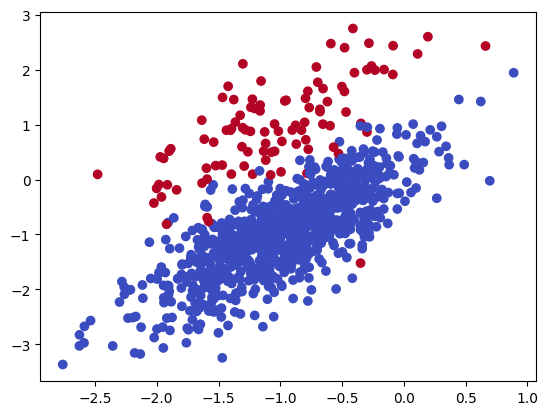

In [10]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'],cmap='coolwarm')

In [11]:
!pip install imblearn

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
oversample = SMOTE()
x,y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

In [14]:
x.shape

(1800, 2)

In [18]:
len(y[y == 0])

900

In [19]:
len(y[y == 1])

900

In [20]:
df1 = pd.DataFrame(x, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
oversampled_df = pd.concat([df1, df2], axis=1)

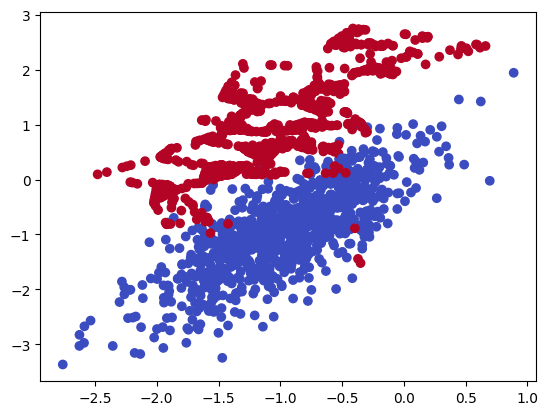

In [21]:
plt.scatter(oversampled_df['f1'], oversampled_df['f2'], c=oversampled_df['target'], cmap='coolwarm')